<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install matplotlib_venn

### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
import pandas as pd

# 1. Check missing values per column
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_summary)

# 2. Percentage of missing values
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
print("\nPercentage missing:\n", missing_percent)

# For numerical columns → fill with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns → fill with mode (most frequent value)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 4. Verify no missing values remain
print("\nMissing values after imputation:\n", df.isnull().sum().sum())

Missing values per column:
 AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
MainBranch                        0
Age                               0
Employment                        0
Check                             0
ResponseId                        0
Length: 114, dtype: int64

Percentage missing:
 AINextMuch less integrated    98.245641
AINextLess integrated         96.401119
AINextNo change               80.900714
AINextMuch more integrated    79.464217
EmbeddedAdmired               74.428840
                                ...    
MainBranch                     0.000000
Age                            0.000000
Employment                     0.000000
Check                          0.000000
ResponseId                     0.000000
Length: 114, dtype: float64

Missing values after imputation:
 0


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
df['Employment'].value_counts()
df['JobSat'].value_counts()
df['YearsCodePro'].value_counts()

YearsCodePro
2                     17995
3                      4093
5                      3526
10                     3251
4                      3215
Less than 1 year       2856
6                      2843
1                      2639
8                      2549
7                      2517
12                     1777
15                     1635
20                     1549
9                      1493
11                     1312
13                     1127
14                     1082
25                      998
16                      946
18                      867
17                      814
30                      689
24                      632
19                      516
22                      492
23                      448
26                      426
27                      380
21                      380
28                      342
35                      285
29                      196
40                      194
32                      194
34                      169
38     

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


Unique JobSat values: [ 7.  8.  5. 10.  6.  9.  4.  3.  2.  1.  0.]
Value counts:
 JobSat
7.0     42690
8.0      7509
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
0.0       311
1.0       276
Name: count, dtype: int64


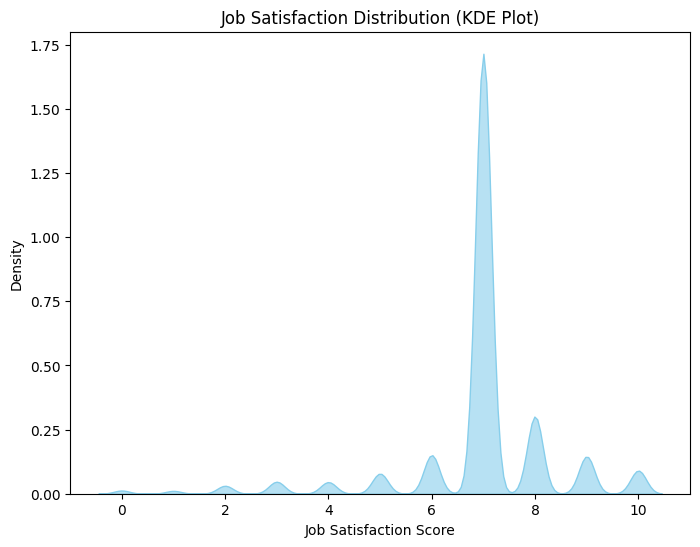

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Inspect JobSat column ---
print("Unique JobSat values:", df['JobSat'].dropna().unique())
print("Value counts:\n", df['JobSat'].value_counts(dropna=False))

# --- Step 3: KDE Plot for numeric JobSat (if scaled 0-10 or numeric scores) ---
plt.figure(figsize=(8,6))
sns.kdeplot(
    data=pd.to_numeric(df['JobSat'], errors='coerce').dropna(),
    fill=True, color="skyblue", alpha=0.6
)
plt.title("Job Satisfaction Distribution (KDE Plot)")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Density")
plt.show()

# --- Step 4: Interpretation Helper ---
# If categorical (pie chart):
#   - Look at which category has the largest percentage.
# If numeric (KDE):
#   - See where the density peaks (high values = more satisfied workforce).

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


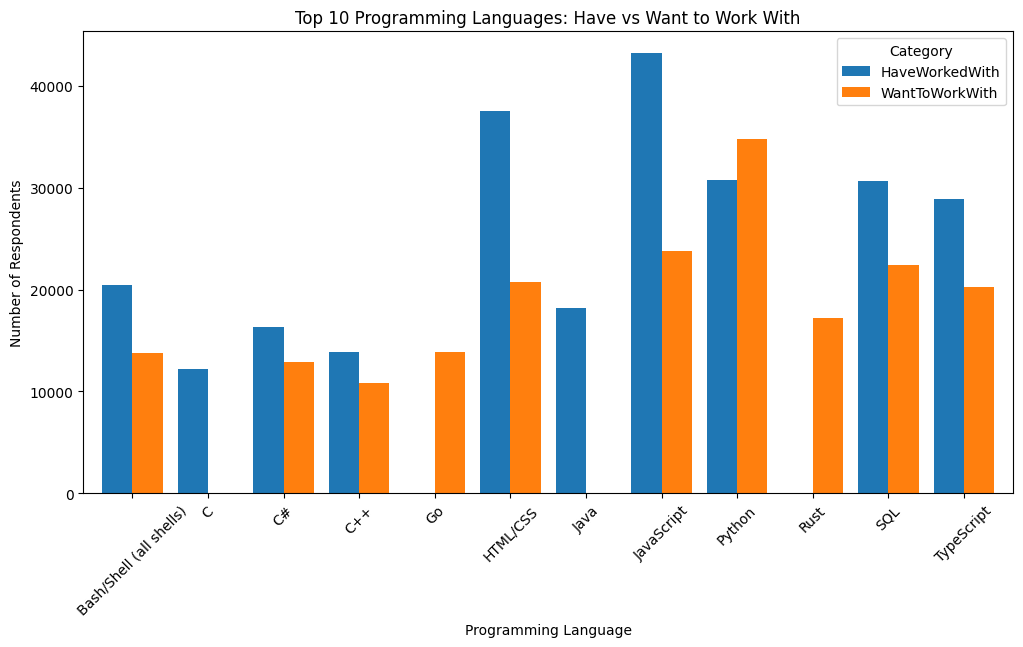

In [10]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

# --- Step 1: Prepare data ---
# Split and explode "have worked with"
have = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode().str.strip()
want = df['LanguageWantToWorkWith'].dropna().str.split(';').explode().str.strip()

# --- Step 2: Grouped bar chart ---
# Count top languages from both
have_counts = have.value_counts().head(10)
want_counts = want.value_counts().head(10)

# Combine into one DataFrame
lang_compare = pd.DataFrame({
    "HaveWorkedWith": have_counts,
    "WantToWorkWith": want_counts
}).fillna(0).astype(int)

# Plot grouped bar chart
lang_compare.plot(
    kind="bar",
    figsize=(12,6),
    width=0.8
)
plt.title("Top 10 Programming Languages: Have vs Want to Work With")
plt.ylabel("Number of Respondents")
plt.xlabel("Programming Language")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


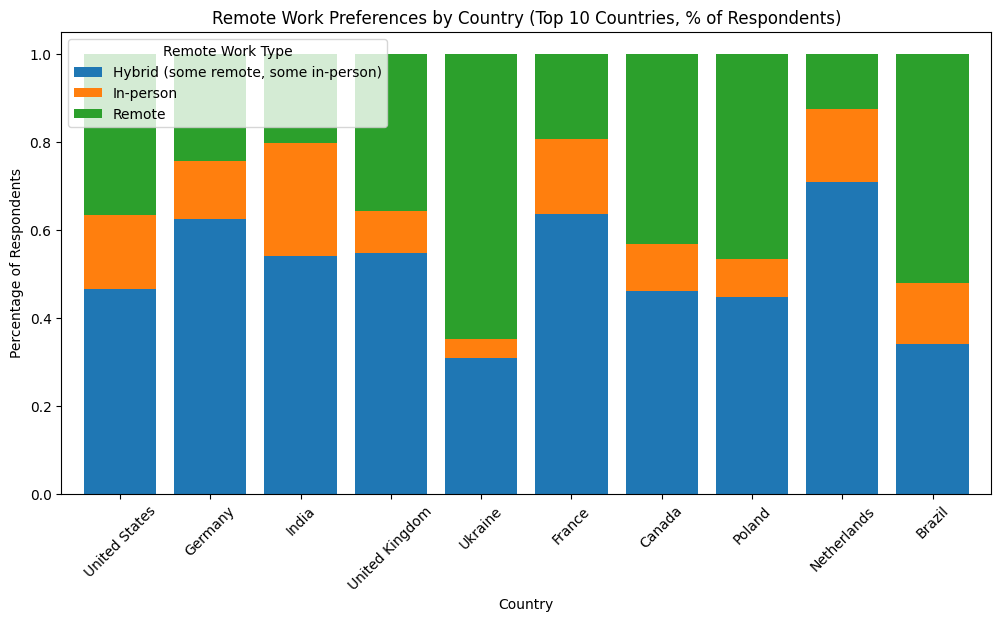

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Step 2: Clean data for graph ---
df['Country'] = df['Country'].replace(
    "United Kingdom of Great Britain and Northern Ireland",
    "United Kingdom"
)

df['Country'] = df['Country'].replace(
    "United States of America",
    "United States"
)

# --- Step 2: Count Remote Work distribution by Country ---
remote_country = pd.crosstab(df['Country'], df['RemoteWork'])

# --- Step 3: Select top 10 countries by response count ---
top_countries = df['Country'].value_counts().head(10).index
remote_country_top = remote_country.loc[top_countries]

# --- Step 4: Convert to percentages ---
remote_country_top_pct = remote_country_top.div(remote_country_top.sum(axis=1), axis=0)

# --- Step 5: Plot stacked bar chart (percentages) ---
remote_country_top_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    width=0.8
)

plt.title("Remote Work Preferences by Country (Top 10 Countries, % of Respondents)")
plt.ylabel("Percentage of Respondents")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend(title="Remote Work Type")
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


Usable paired rows: 65437
Pearson correlation: 0.066 (p=9.01e-64)
Spearman correlation: 0.105 (p=2.91e-159)


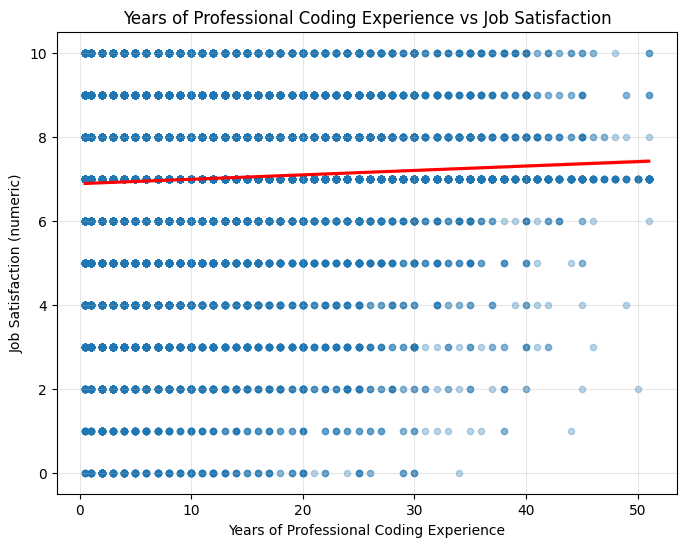

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import re

# --- Convert YearsCodePro to numeric ---
def convert_years(val):
    if pd.isna(val):
        return None
    s = str(val).strip()
    s_low = s.lower()
    if s_low.startswith('less than'):
        return 0.5
    if s_low.startswith('more than'):
        return 51.0
    try:
        return float(s)
    except:
        nums = re.findall(r'\d+', s)
        return float(nums[0]) if nums else None

df = df.assign(
    YearsCodePro_num = df['YearsCodePro'].apply(convert_years),
    JobSat_num = pd.to_numeric(df['JobSat'], errors='coerce')  # already numeric
)

# --- Drop missing pairs ---
subset = df[['YearsCodePro_num','JobSat_num']].dropna()
print(f"Usable paired rows: {len(subset)}")

if len(subset) >= 2:
    # Pearson (linear)
    pearson_corr, pearson_p = pearsonr(subset['YearsCodePro_num'], subset['JobSat_num'])
    # Spearman (rank-based)
    spearman_corr, spearman_p = spearmanr(subset['YearsCodePro_num'], subset['JobSat_num'])

    print(f"Pearson correlation: {pearson_corr:.3f} (p={pearson_p:.3g})")
    print(f"Spearman correlation: {spearman_corr:.3f} (p={spearman_p:.3g})")

    # --- Scatter plot with regression line ---
    plt.figure(figsize=(8,6))
    sns.regplot(
        x='YearsCodePro_num',
        y='JobSat_num',
        data=subset,
        scatter_kws={'alpha':0.3, 's':20},
        line_kws={'color':'red'}
    )
    plt.title("Years of Professional Coding Experience vs Job Satisfaction")
    plt.xlabel("Years of Professional Coding Experience")
    plt.ylabel("Job Satisfaction (numeric)")
    plt.grid(alpha=0.3)
    plt.show()
else:
    print("Not enough data for correlation analysis.")


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


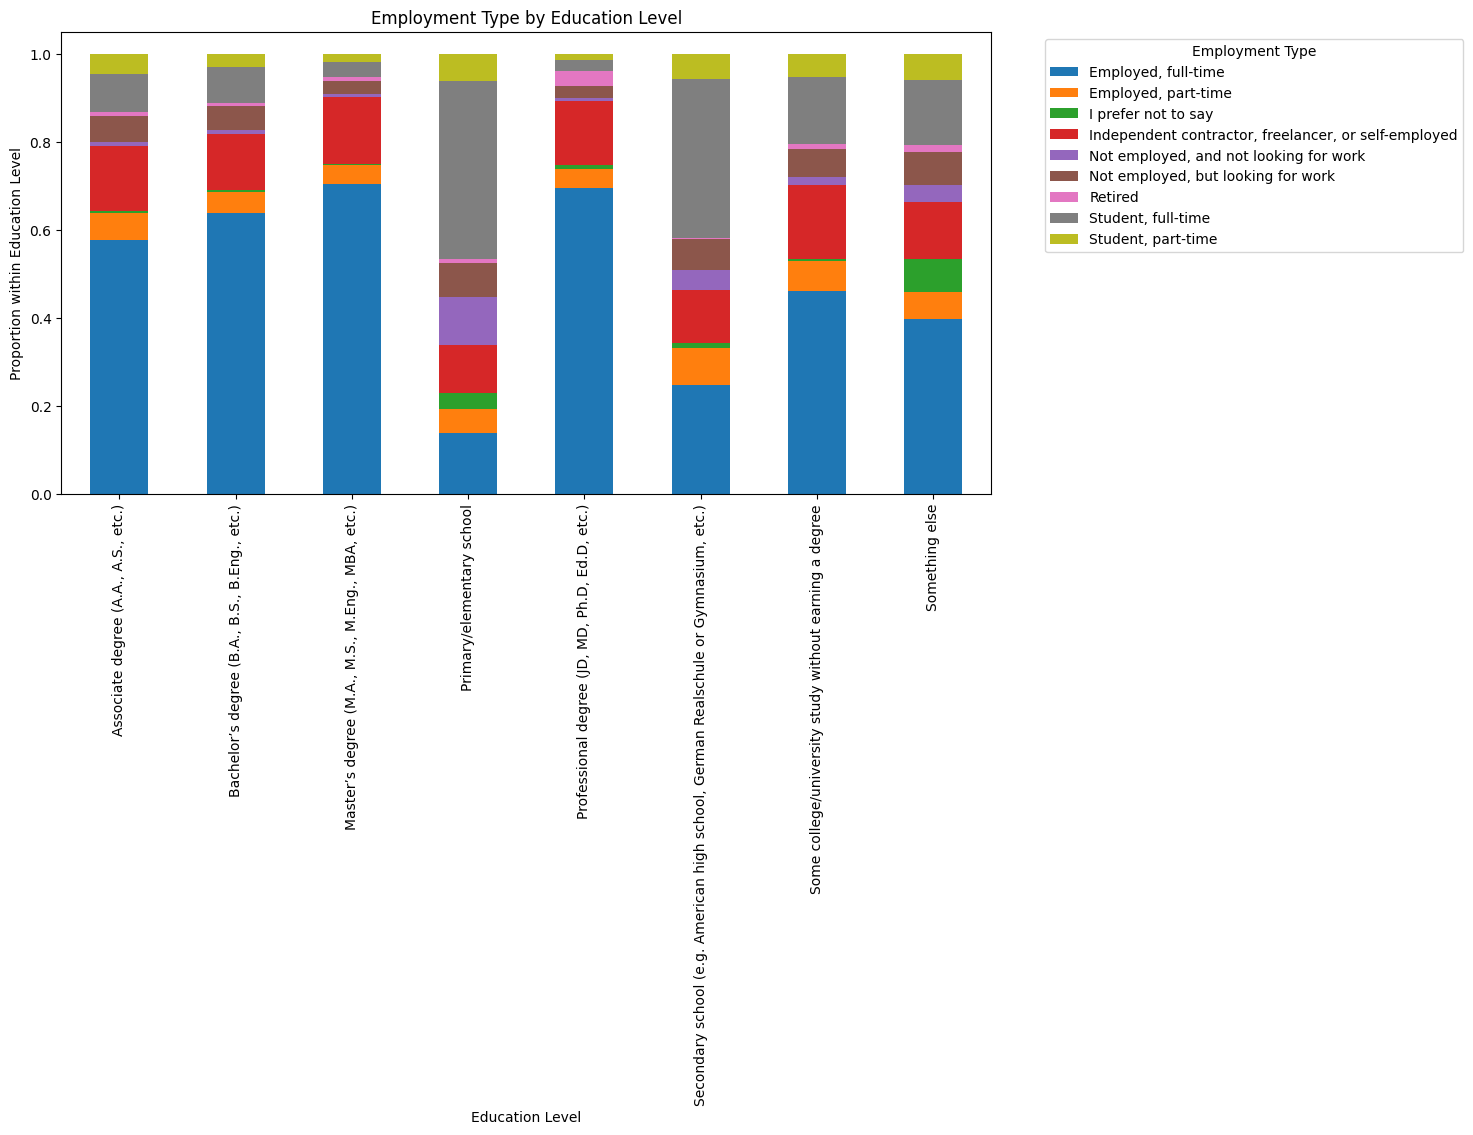

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Split multiple employment types into rows
tmp = df.dropna(subset=['EdLevel', 'Employment']).copy()
tmp = tmp.assign(Employment=tmp['Employment'].str.split(';')).explode('Employment')
tmp['Employment'] = tmp['Employment'].str.strip()

# Step 2: Cross-tab (now with cleaner categories)
crosstab = pd.crosstab(tmp['EdLevel'], tmp['Employment'], normalize='index')

# ---- Option A: Stacked bar ----
crosstab.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Employment Type by Education Level")
plt.ylabel("Proportion within Education Level")
plt.xlabel("Education Level")
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
# Example: assume 'df' is your cleaned dataset

# Save to CSV
df.to_csv("modified_dataset.csv", index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
